# Analysis and Visualization of Global Shark Attacks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(rc={"figure.figsize": (12.,6.)})

In [3]:
df = pd.read_csv("../data/cleantable.csv", encoding= 'unicode_escape')


In [4]:
df = df.drop(["Unnamed: 0"], axis = 1)


In [5]:
df.head()

,Year,Type,Country,Area,Activity,Sex,Fatal (Y/N),Month,New_Age
0,2018,Boat,USA,California,Other,F,N,6,57.0
1,2018,Unprovoked,USA,Georgia,Swimming,F,N,6,11.0
2,2018,Invalid,USA,Hawaii,Surfing,M,N,6,48.0
3,2018,Unprovoked,AUSTRALIA,New South Wales,Surfing,M,N,6,NaN
4,2018,Provoked,MEXICO,Colima,Water Sports,M,N,6,NaN


## Shark Attacks per year evolution

### Hypothesi: The % of attacks during surf have increased overtime

First we will take a look at the number of shark attacks over time

<AxesSubplot:xlabel='Year', ylabel='Count'>

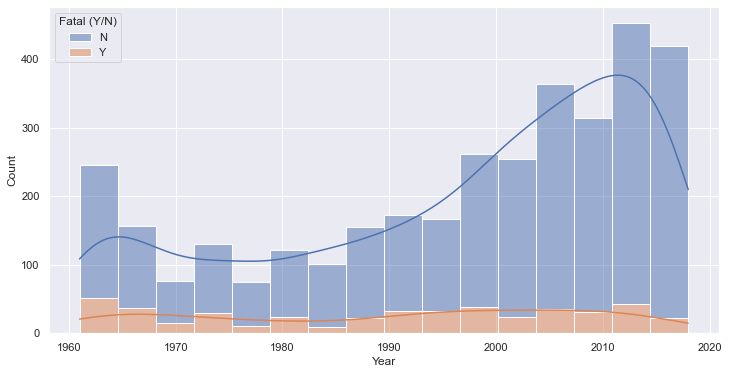

In [6]:
sns.histplot(data=df, x="Year", hue="Fatal (Y/N)", multiple="stack", kde = True)

We can see how even if the number of shark attacks has considerably increased during recent decades, the number of fatal atacks
has not increased accordingly. One of the reasons to be might be the better medical system.

<AxesSubplot:xlabel='Year', ylabel='Count'>

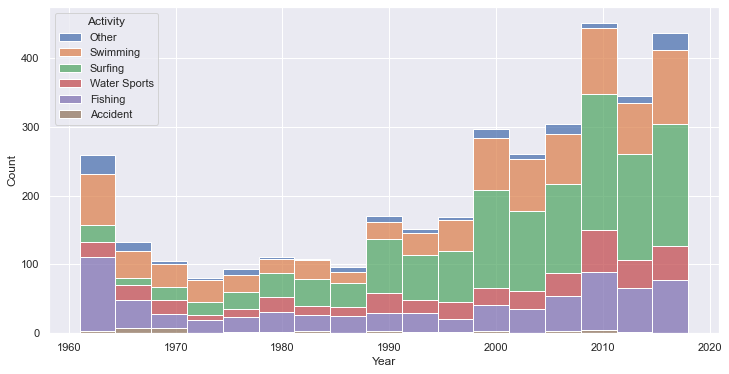

In [7]:
sns.histplot(data=df, x="Year", hue="Activity", multiple="stack")

Hypothesi answer: It is true that the % of attacks while surfing have increased overtime. It makes sense since even if the sport has history, the number of practicants has increased and keeps increasing.

## In which time of the year are there more shark attacks?

<AxesSubplot:xlabel='Month'>

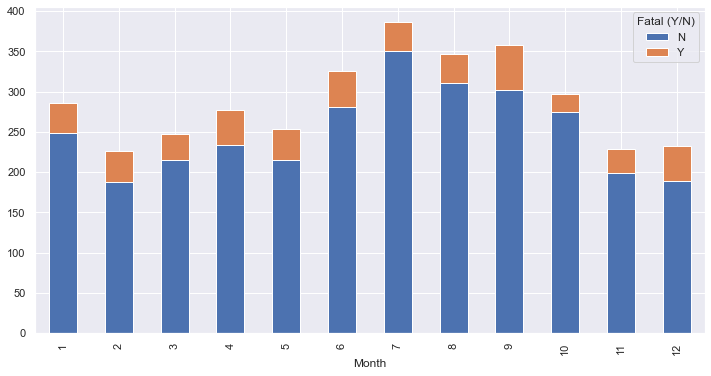

In [8]:
df_plot = df.groupby(['Fatal (Y/N)', 'Month']).size().reset_index().pivot(columns='Fatal (Y/N)', index='Month', values=0)
df_plot.plot(kind='bar', stacked=True )

We can see how the summer month have many more attacks than the rest of months. It is also worth noting that the ratio Fatal/Total remains quite stable throughout the different months.

### Hypothesis: Florida shark season is between April and October

In [62]:
df_florida = df[df["Area"] == "Florida"]

<AxesSubplot:xlabel='Month'>

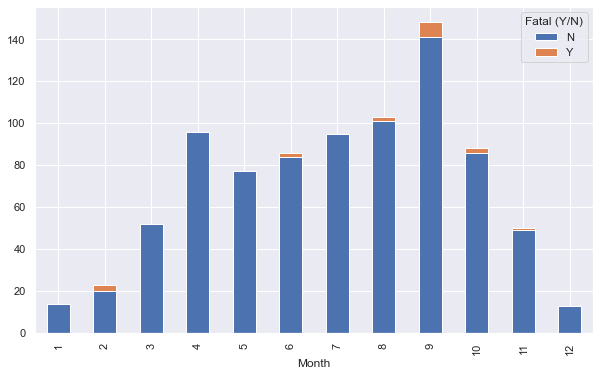

In [66]:
df_florida_plot = df_florida.groupby(['Fatal (Y/N)', 'Month']).size().reset_index().pivot(columns='Fatal (Y/N)', index='Month', values=0)
df_florida_plot.plot(kind='bar', stacked=True )

Hypothesis Answer: It is true that from April to October we see a great increase in the number of shark attacks in Florida.

## Which type of attacks are more common?

<AxesSubplot:xlabel='Type', ylabel='count'>

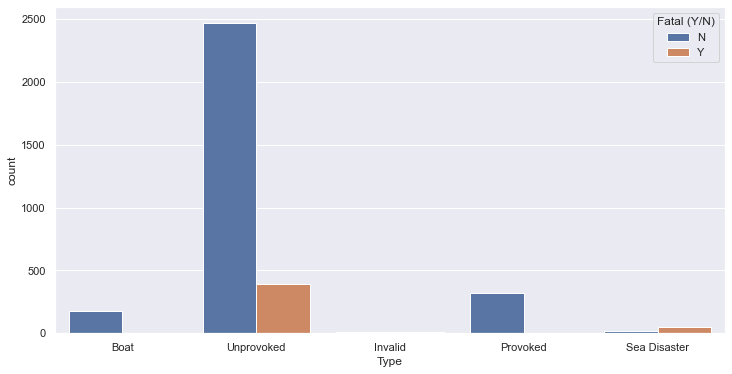

In [9]:
sns.countplot(x=df["Type"], hue=df["Fatal (Y/N)"])

“Unprovoked bites” are defined as incidents in which a bite on a live human occurs in the shark's natural habitat with no 
human provocation of the shark.


We can see that unprovocked are the most predominant type, we will later see when analyzing the activities that the most current are activities where the person was not trying to provoke the animal

## Shark attacks per Country

[]

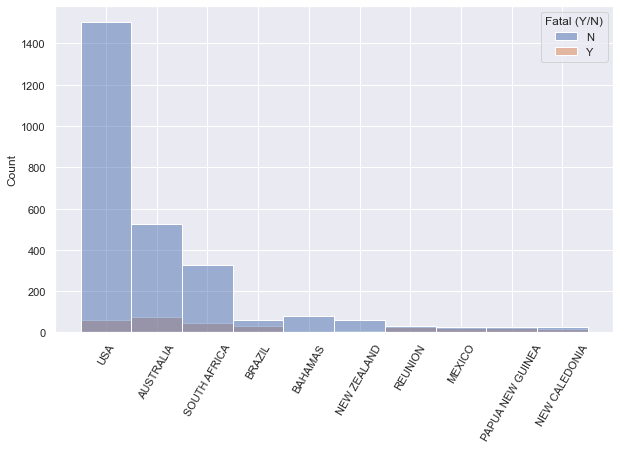

In [44]:
countries_count = df["Country"].value_counts()[:10].index.to_list()
countries = pd.Categorical(df['Country'], countries_count)
sns.set(rc={'figure.figsize':(10,6)})
sns.histplot(data=df, x=countries, hue="Fatal (Y/N)", alpha=0.5)
plt.xticks(rotation=60)
plt.plot()

[]

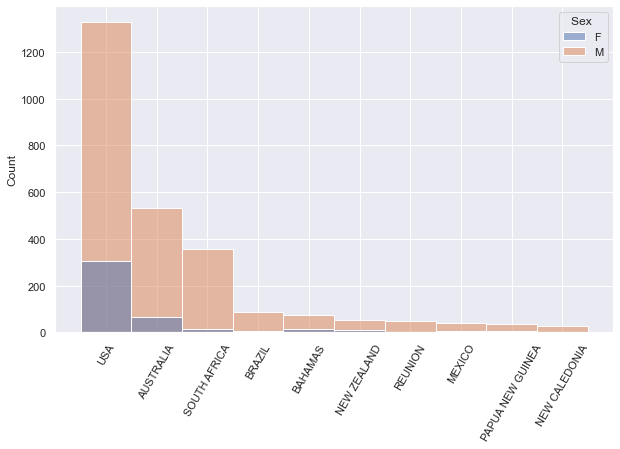

In [11]:
sns.histplot(data=df, x=countries, hue="Sex ", alpha=0.5)
plt.xticks(rotation=60)
plt.plot()

[]

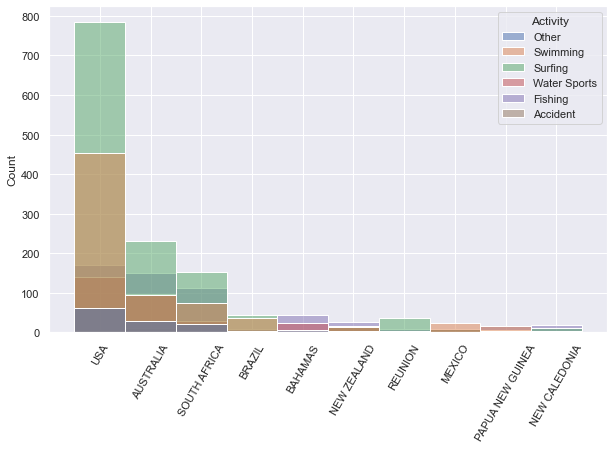

In [12]:
sns.histplot(data=df, x=countries, hue="Activity", alpha=0.5)
plt.xticks(rotation=60)
plt.plot()

The results are pretty obvious, USA is comfortably leading in number of attacks followed by Australia and South Africa. The result is not surprising since these are 3 of the most notorious countries when it comes to shark presence.
It is also worth noting that USA has a much higher population than the other 2.


Another interesting thought is that USA has a significantly high ratio of women attacked by sharks in comparison with other countries.

And finally that Australia has a particularly high mortality ratio.

## Shark Attacks in the USA by Area

### Hypothesis: Florida is the most dangerous state in the USA when it comes to shark attacks

The US is one of my favorite countries and one of my most desired places to perform the Ironman, so I want to check which states are more dangerous for swimming

In [22]:
#I will create a sub data frame where the country is equal to the USA
df_usa = df[df["Country"] == "USA"]
df_usa.head()

,Year,Type,Country,Area,Activity,Sex,Fatal (Y/N),Month,New_Age
0,2018,Boat,USA,California,Other,F,N,6,57.0
1,2018,Unprovoked,USA,Georgia,Swimming,F,N,6,11.0
2,2018,Invalid,USA,Hawaii,Surfing,M,N,6,48.0
7,2018,Unprovoked,USA,Florida,Fishing,M,N,5,52.0
8,2018,Unprovoked,USA,Florida,Swimming,M,N,5,15.0


In [67]:
countries_usa_count = df_usa["Area"].value_counts()[:10].index.to_list()
countries_usa = pd.Categorical(df_usa['Area'], countries_usa_count)
sns.set(rc={'figure.figsize':(12,8)})

[]

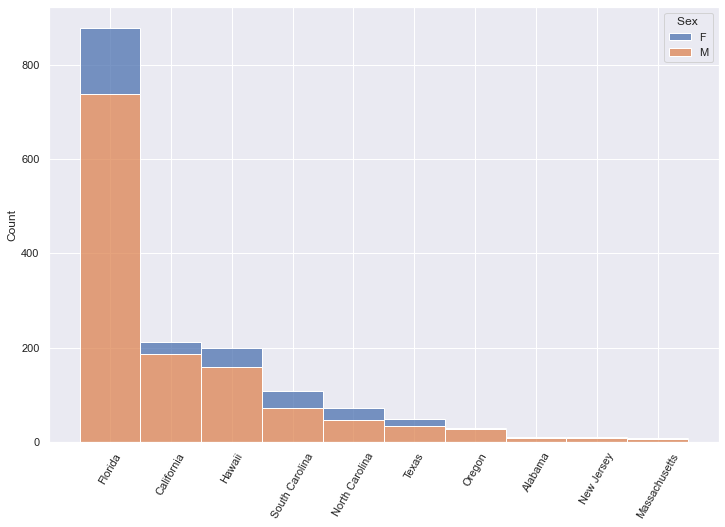

In [38]:
sns.histplot(data=df_usa, x=countries_usa, hue="Sex ", multiple="stack")
plt.xticks(rotation=60)
plt.plot()

[]

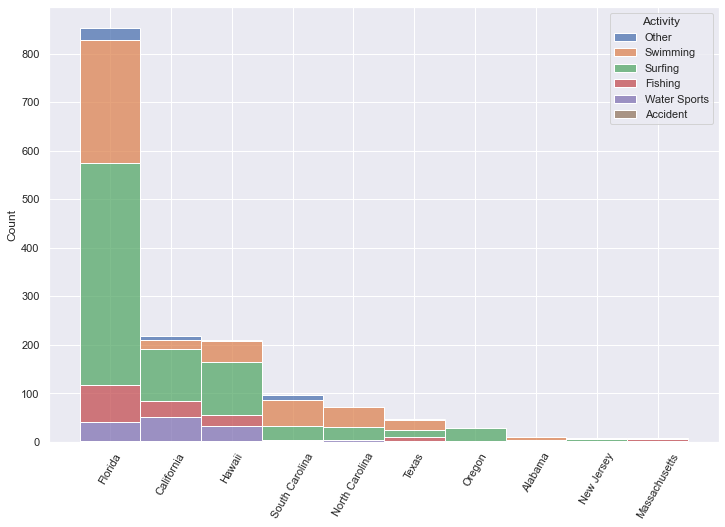

In [36]:
sns.histplot(data=df_usa, x=countries_usa, hue="Activity", multiple="stack")
plt.xticks(rotation=60)
plt.plot()

## Shark attacks by Activity

### Hypothesis: Surfing is the activity with the most attacks

One of the first memories I have with sharks was watching the TV and seeing a surfer bitten by a shark, since then I have always associated sharks with the sport.
The first thought when I saw the table and saw that the activities were tracked, I thought that surfing would be top of the list.

<AxesSubplot:xlabel='Activity'>

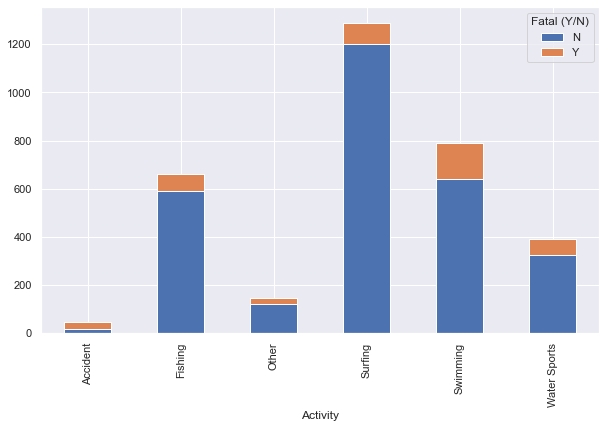

In [13]:
df_plot = df.groupby(['Fatal (Y/N)', 'Activity']).size().reset_index().pivot(columns='Fatal (Y/N)', index='Activity', values=0)
df_plot.plot(kind='bar', stacked=True )

<AxesSubplot:xlabel='Activity'>

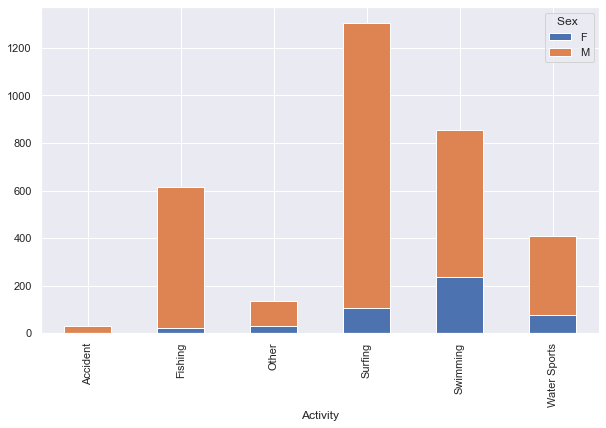

In [14]:
df_plot = df.groupby(['Sex ', 'Activity']).size().reset_index().pivot(columns='Sex ', index='Activity', values=0)
df_plot.plot(kind='bar', stacked=True )

The hypothesis was right, but it surprised me that the ratio of women vs men attacked in swimming is that much higher than in surfing.

What it did not surprise me was that fishing has the lowest ratio women vs men since it is a practise much more extended with men. 

## Shark Attacks by Age

### Hipotesis: 50% of Attacks happen to people of ages between 18 and 30

<AxesSubplot:xlabel='New_Age', ylabel='Count'>

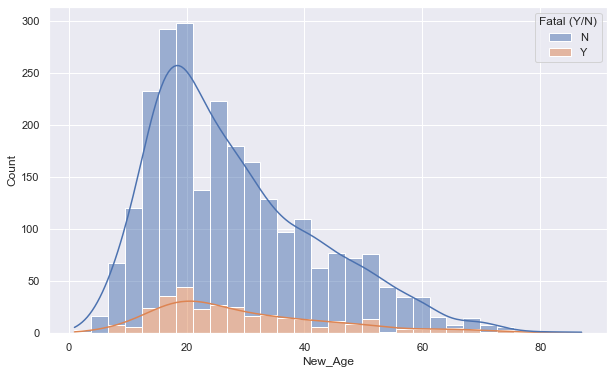

In [15]:
sns.histplot(data=df, x="New_Age", hue="Fatal (Y/N)", multiple="stack", kde = True)

<AxesSubplot:xlabel='New_Age', ylabel='Count'>

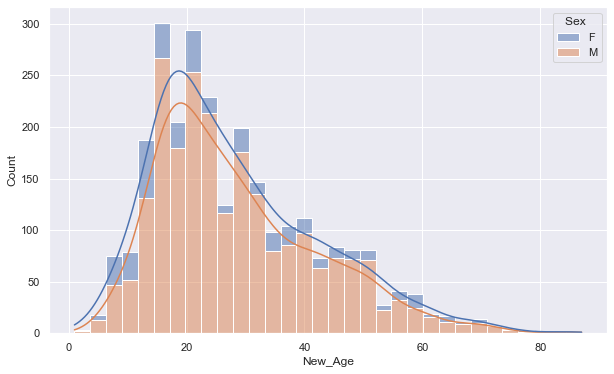

In [16]:
sns.histplot(data=df, x="New_Age", hue="Sex ", multiple="stack", kde = True)

<AxesSubplot:xlabel='New_Age'>

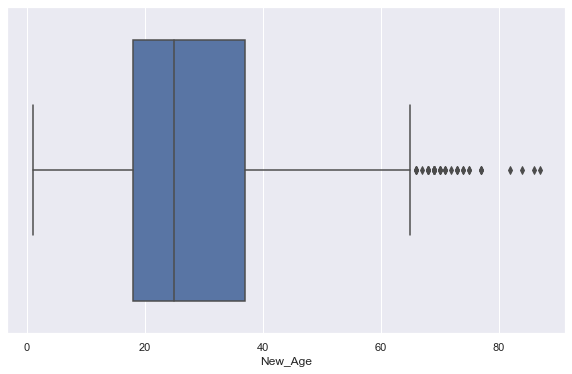

In [17]:
sns.boxplot(x="New_Age", data=df)

In [18]:
df["New_Age"].describe()

count    2705.000000
mean       28.312015
std        14.274059
min         1.000000
25%        18.000000
50%        25.000000
75%        37.000000
max        87.000000
Name: New_Age, dtype: float64

Even if the mean and the median are between 18 and 30, there is a higher number of attacks on people between 30 and 40 than I expected. Let's analyze this with the activities and see why.

<AxesSubplot:xlabel='New_Age', ylabel='Count'>

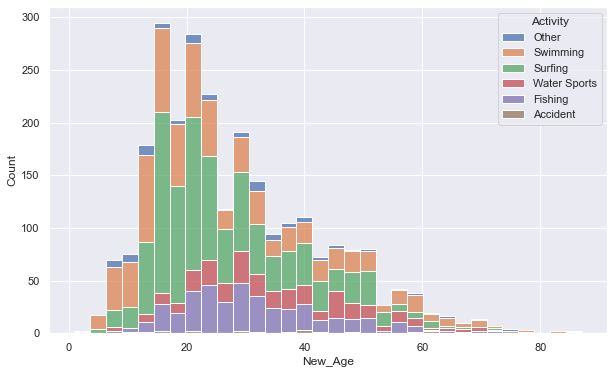

In [19]:
sns.histplot(data=df, x="New_Age", hue="Activity", multiple="stack")

People in the late teens and 20s surf and swim much more than people in their 30s, but there is no decrease in the people fishing and practising water sports in their 30s.

After analyzing it we can say that the Hypotesis was wrong and there is more people being attacked at 30 years of age and more.

## Main Hypothesis: I want to find to know the most dangerous place to perform an Ironman

In [45]:
df_swim = df[df["Activity"] == "Swimming"]

In [52]:
df_swim = df_swim[df_swim["Sex "] == "M"]

In [53]:
df_swim.head()

,Year,Type,Country,Area,Activity,Sex,Fatal (Y/N),Month,New_Age
6,2018,Unprovoked,BRAZIL,Pernambuco,Swimming,M,Y,6,18.0
8,2018,Unprovoked,USA,Florida,Swimming,M,N,5,15.0
9,2018,Unprovoked,USA,Florida,Swimming,M,N,5,12.0
12,2018,Unprovoked,USA,South Carolina,Swimming,M,N,5,10.0
16,2018,Unprovoked,THAILAND,Hua Hin,Swimming,M,N,4,NaN


<AxesSubplot:xlabel='New_Age', ylabel='Count'>

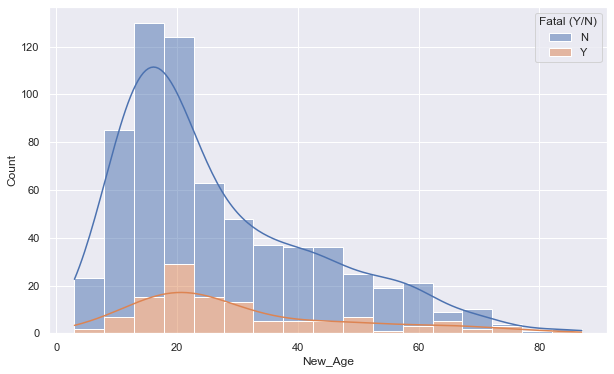

In [48]:
sns.histplot(data=df_swim, x="New_Age", hue="Fatal (Y/N)", multiple="stack", kde = True)

<AxesSubplot:xlabel='Year', ylabel='Count'>

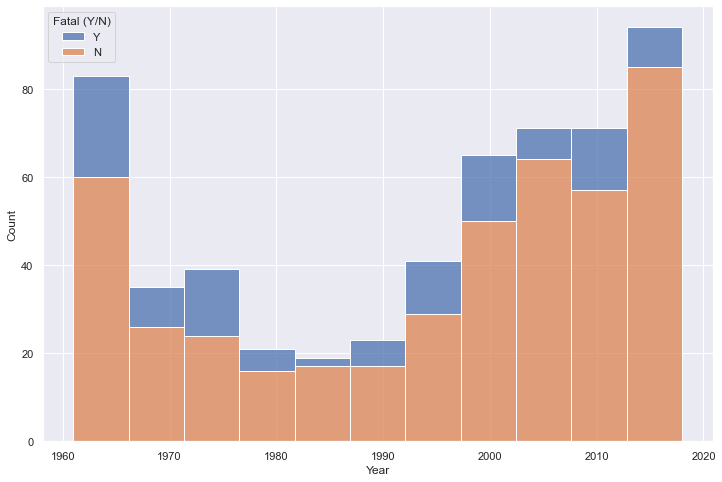

In [58]:
sns.histplot(data=df_swim, x="Year", hue="Fatal (Y/N)", multiple="stack")

[]

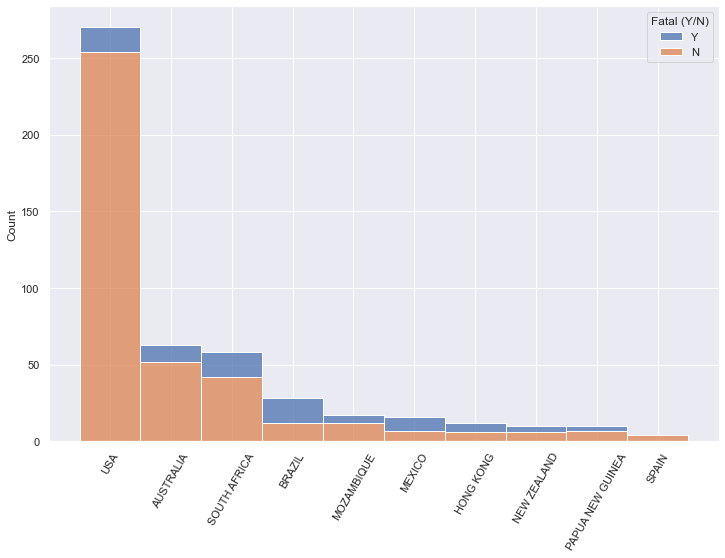

In [55]:
countries_swim_count = df_swim["Country"].value_counts()[:10].index.to_list()
countries_swim = pd.Categorical(df_swim['Country'], countries_swim_count)
sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(data=df_swim, x=countries_swim, hue="Fatal (Y/N)", multiple="stack")
plt.xticks(rotation=60)
plt.plot()

In [60]:
df_swim_us = df_swim[df_swim["Country"] == "USA"]

[]

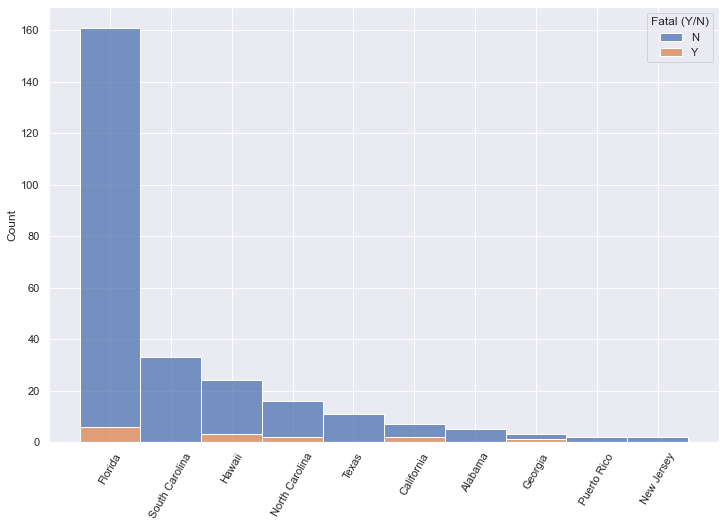

In [68]:
countries_usaswim_count = df_swim_us["Area"].value_counts()[:10].index.to_list()
countries_usaswim = pd.Categorical(df_swim_us['Area'], countries_usaswim_count)
sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(data=df_swim_us, x=countries_usaswim, hue="Fatal (Y/N)", multiple="stack")
plt.xticks(rotation=60)
plt.plot()